In [2]:
from data_generator_torch import Normalize,FireDataset
import os 
from torch.utils.data import Dataset, DataLoader
root_path1 = '/home/z/h/zhao2/TS-SatFire/dataset/'
root_path2 = '/geoinfo_vol1/home/z/h/zhao2/CalFireMonitoring/'
mode = 'ba'
interval = 6
ts_length = 6
id = 'US_2021_ID4558511544420210705'

test_image_path1 = os.path.join(root_path1,
                               f'dataset_test/{mode}_{id}_img_seqtoseql_{ts_length}i_{interval}.npy')
test_label_path1 = os.path.join(root_path1,
                               f'dataset_test/{mode}_{id}_label_seqtoseql_{ts_length}i_{interval}.npy')
test_image_path2 = os.path.join(root_path2,
                                'data_test_proj5/proj5_'+id+'_img_seqtoseql_' + str(ts_length) + '.npy')
test_label_path2 = os.path.join(root_path2,
                                'data_test_proj5/proj5_'+id+'_label_seqtoseql_' + str(ts_length) + '.npy')
transform1 = Normalize(mean = [17.952442,26.94709,19.82838,317.80234,308.47693,13.87255,291.0257,288.9398],
    std = [15.359564,14.336508,10.64194,12.505946,11.571564,9.666024,11.495529,7.9788895])
transform2 = Normalize(mean=[47.041927,53.98012,36.33056,318.13885,308.42276,29.793797,291.0422,288.78125],
                std=[22.357374,21.575853,14.279626,11.570329,10.646594,14.370376,11.274373,6.923434])
test_dataset1 = FireDataset(image_path=test_image_path1, label_path=test_label_path1, transform=transform1, ts_length=ts_length, n_channel=8)
test_dataset2 = FireDataset(image_path=test_image_path2, label_path=test_label_path2, transform=transform2, ts_length=ts_length, n_channel=8)
test_dataloader1 = DataLoader(test_dataset1, batch_size=4, shuffle=False)
test_dataloader2 = DataLoader(test_dataset2, batch_size=4, shuffle=False)

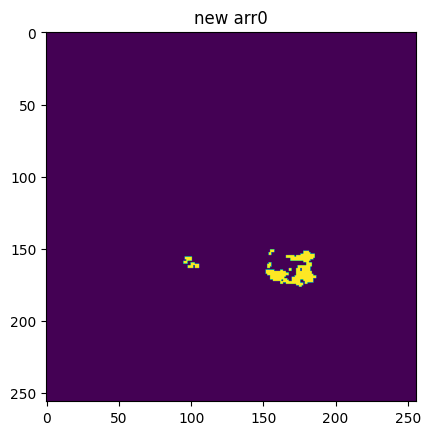

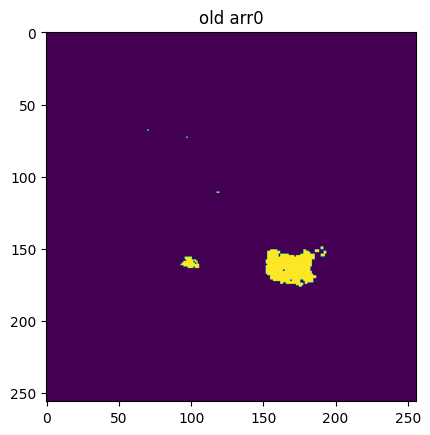

In [14]:
import matplotlib.pyplot as plt
channel=1

arr1 =  next(iter(test_dataloader1)).get('labels')
plt.title(f'new arr{0}')
plt.imshow(arr1[0,channel,4,:,:])
plt.show()

arr2 =  next(iter(test_dataloader2)).get('labels')
plt.title(f'old arr{0}')
plt.imshow(arr2[0,channel,4,:,:])
plt.show()
